In [4]:
fish = pd.read_csv('/Users/skylark/Desktop/Misc/datasets/Fish.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [12]:
fish.iloc[:,:-1].corr()

,Weight,Length1,Length2,Length3,Height
Weight,1.000000,0.915712,0.918618,0.923044,0.724345
Length1,0.915712,1.000000,0.999517,0.992031,0.625378
Length2,0.918618,0.999517,1.000000,0.994103,0.640441
Length3,0.923044,0.992031,0.994103,1.000000,0.703409
Height,0.724345,0.625378,0.640441,0.703409,1.000000


In [13]:
x = fish.iloc[:,:-1]
x.sample(5)

,Species,Weight,Length1,Length2,Length3,Height
67,Parkki,170.0,19.0,20.7,23.2,9.3960
7,Bream,390.0,27.6,30.0,35.0,12.6700
138,Pike,567.0,43.2,46.0,48.7,7.7920
100,Perch,197.0,23.5,25.6,27.0,6.5610
19,Bream,650.0,31.0,33.5,38.7,14.4738


In [18]:
y = fish.iloc[:,6:7]
y.head()

,Width
0,4.0200
1,4.3056
2,4.6961
3,4.4555
4,5.1340


In [19]:
import statsmodels.api as sm

In [21]:
x1 = sm.add_constant(x)
x1.head()

,const,Species,Weight,Length1,Length2,Length3,Height
0,1.0,Bream,242.0,23.2,25.4,30.0,11.5200
1,1.0,Bream,290.0,24.0,26.3,31.2,12.4800
2,1.0,Bream,340.0,23.9,26.5,31.1,12.3778
3,1.0,Bream,363.0,26.3,29.0,33.5,12.7300
4,1.0,Bream,430.0,26.5,29.0,34.0,12.4440


In [26]:
x1 = pd.get_dummies(x1, drop_first=True)
x1.head()

,const,Weight,Length1,Length2,Length3,Height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1.0,242.0,23.2,25.4,30.0,11.5200,0,0,0,0,0,0
1,1.0,290.0,24.0,26.3,31.2,12.4800,0,0,0,0,0,0
2,1.0,340.0,23.9,26.5,31.1,12.3778,0,0,0,0,0,0
3,1.0,363.0,26.3,29.0,33.5,12.7300,0,0,0,0,0,0
4,1.0,430.0,26.5,29.0,34.0,12.4440,0,0,0,0,0,0


In [27]:
x.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x1, y, test_size=0.3, random_state=40)

In [31]:
test_x.head()

,const,Weight,Length1,Length2,Length3,Height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
38,1.0,87.0,18.2,19.8,22.2,5.6166,0,0,0,1,0,0
118,1.0,820.0,36.6,39.0,41.3,12.4313,0,1,0,0,0,0
140,1.0,950.0,48.3,51.7,55.1,8.9262,0,0,1,0,0,0
5,1.0,450.0,26.8,29.7,34.7,13.6024,0,0,0,0,0,0
113,1.0,700.0,34.0,36.0,38.3,10.6091,0,1,0,0,0,0


In [32]:
mod = sm.OLS(train_y, train_x).fit()

In [33]:
mod.params

const               -2.071379
Weight               0.000295
Length1              0.243248
Length2             -0.286170
Length3              0.120871
Height               0.311574
Species_Parkki       0.968863
Species_Perch        2.397091
Species_Pike         1.328297
Species_Roach        1.957331
Species_Smelt        1.838256
Species_Whitefish    2.072231
dtype: float64

In [41]:
train_x.columns

Index(['const', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [37]:
mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.961   
Dependent Variable: Width            AIC:                82.4316 
Date:               2020-03-11 17:55 BIC:                114.9460
No. Observations:   111              Log-Likelihood:     -29.216 
Df Model:           11               F-statistic:        249.1   
Df Residuals:       99               Prob (F-statistic): 6.19e-67
R-squared:          0.965            Scale:              0.11113 
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.0714   0.5926 -3.4955 0.0007 -3.2472 -0.8956
Weight             0.0003   0.0004  0.8112 0.4192 -0.0004  0.0010
Length1            0.2432   0.1623  1.4987 0.1371 -0.0788  0.5653
Length2           -0.2862   0.2042 -1.4015 0.1642 -0.6913  0.1190
Length3            0.1209   0.1256  0.9620 0.3384 -0.1284  0.3702
Height             0.3116   0.0446  6.9853 0.0000  0.2231  0.4001
Species_Parkki     0.9689   0.3072  3.1534 0.0021  0.3592  1.5785
Species_Perch      2.3971   0.4563  5.2529 0.0000  1.4916  3.3026
Species_Pike       1.3283   0.5723  2.3210 0.0223  0.1928  2.4638
Species_Roach      1.9573   0.3396  5.7639 0.0000  1.2835  2.6311
Species_Smelt      1.8383   0.4933  3.7263 0.0003  0.8594  2.8171
Species_Whitefish  2.0722   0.3454  5.9989 0.0000  1.3868  2.7577
-----------------------------------------------------------------
Omnibus:              22.257       Durbin-Watson:          1.935 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       36.656
Skew:                 0.893        Prob(JB):               0.000 
Kurtosis:             5.176        Condition No.:          18454 
=================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

### Multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
x_matrix = np.array(x1)
VIF1 = pd.DataFrame(columns=['Column', 'vif'])
for i in range(x_matrix.shape[1]):
    VIF1['vif']=variance_inflation_factor(x_matrix, i)
    VIF1['Column'] = x1.columns

In [68]:
vif = [variance_inflation_factor(x_matrix, i) for i in range(x_matrix.shape[1])]
VIF_fact = pd.DataFrame()
VIF_fact['Column'] = x1.columns
VIF_fact['VIF'] = vif

In [69]:
VIF_fact

,Column,VIF
0,const,334.544729
1,Weight,15.645706
2,Length1,2428.538157
3,Length2,4354.938677
4,Length3,2057.881409
5,Height,37.123469
6,Species_Parkki,6.143438
7,Species_Perch,44.867245
8,Species_Pike,29.951524
9,Species_Roach,12.024212


In [70]:
mod.fittedvalues

15     5.405933
3      4.149579
66     3.101025
4      4.189296
109    5.744544
         ...   
71     4.430636
12     4.826813
50     4.139656
7      4.350199
70     4.257491
Length: 111, dtype: float64

In [72]:
mod.resid

15     0.174067
3      0.305921
66     0.193375
4      0.944704
109    0.273456
         ...   
71    -0.196636
12    -0.458813
50    -0.012456
7      0.339801
70    -0.113491
Length: 111, dtype: float64

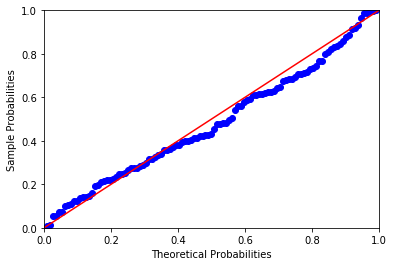

In [76]:
prob_p = sm.ProbPlot(mod.resid)
prob_p.ppplot(line='45')
plt.show()

In [77]:
from sklearn.preprocessing import normalize

In [87]:
res = (mod.resid - mod.resid.mean())/mod.resid.std()

In [89]:
fit = (mod.fittedvalues - mod.fittedvalues.mean())/mod.fittedvalues.std()
fit

15     0.621718
3     -0.133324
66    -0.763483
4     -0.109455
109    0.825216
         ...   
71     0.035586
12     0.273679
50    -0.139287
7     -0.012755
70    -0.068471
Length: 111, dtype: float64

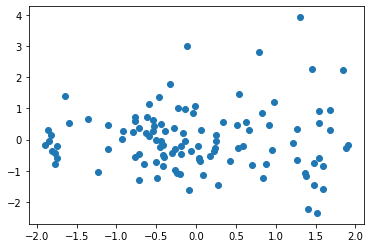

In [90]:
plt.scatter(fit, res)

In [91]:
from scipy.stats import zscore

In [92]:
k = train_x.shape[1]
n = train_x.shape[0]

In [94]:
round(3*(k+1)/n, 2)

0.35

In [95]:
from statsmodels.graphics.regressionplots import influence_plot

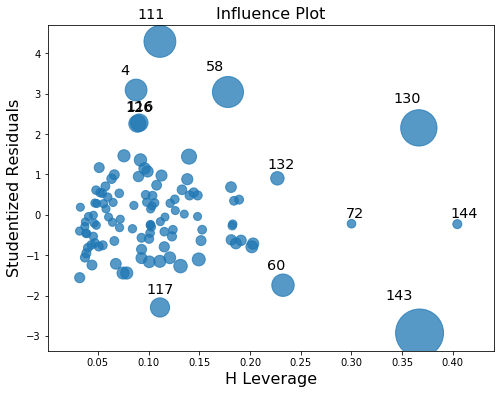

In [96]:
fig, ax = plt.subplots(figsize=(8,6))
influence_plot(mod, ax=ax)
plt.show()

In [97]:
x1[x1.index.isin([130, 143, 144])]

,const,Weight,Length1,Length2,Length3,Height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
130,1.0,300.0,32.7,35.0,38.8,5.9364,0,0,1,0,0,0
143,1.0,1550.0,56.0,60.0,64.0,9.6000,0,0,1,0,0,0
144,1.0,1650.0,59.0,63.4,68.0,10.8120,0,0,1,0,0,0


In [98]:
train_x_new = train_x.drop([130, 143, 144], axis=0)
train_y_new = train_y.drop([130, 143, 144], axis=0)

In [99]:
mod2 = sm.OLS(train_y_new, train_x_new).fit()

In [100]:
mod2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.966   
Dependent Variable: Width            AIC:                64.3312 
Date:               2020-03-11 18:59 BIC:                96.5168 
No. Observations:   108              Log-Likelihood:     -20.166 
Df Model:           11               F-statistic:        278.7   
Df Residuals:       96               Prob (F-statistic): 1.12e-67
R-squared:          0.970            Scale:              0.095689
-----------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
const              -1.0489   0.6097 -1.7202 0.0886 -2.2592 0.1614
Weight              0.0012   0.0004  2.8644 0.0051  0.0004 0.0020
Length1             0.0429   0.1616  0.2652 0.7914 -0.2780 0.3637
Length2            -0.0407   0.2064 -0.1972 0.8441 -0.4504 0.3690
Length3             0.0887   0.1388  0.6393 0.5242 -0.1868 0.3642
Height              0.1534   0.0600  2.5554 0.0122  0.0342 0.2725
Species_Parkki      0.7245   0.3158  2.2941 0.0240  0.0976 1.3514
Species_Perch       1.5317   0.4910  3.1194 0.0024  0.5570 2.5064
Species_Pike        0.0506   0.6283  0.0805 0.9360 -1.1966 1.2978
Species_Roach       1.3274   0.3546  3.7436 0.0003  0.6236 2.0313
Species_Smelt       0.9035   0.5169  1.7478 0.0837 -0.1226 1.9296
Species_Whitefish   1.3459   0.3710  3.6273 0.0005  0.6094 2.0824
-----------------------------------------------------------------
Omnibus:              32.839       Durbin-Watson:          1.890 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       77.315
Skew:                 1.142        Prob(JB):               0.000 
Kurtosis:             6.459        Condition No.:          19522 
=================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [107]:
pvals = pd.DataFrame(mod2.pvalues.reset_index())

In [108]:
pvals.columns = ['Column', 'Pvalues']

In [112]:
sig=pvals[pvals.Pvalues<0.05]

In [114]:
list(sig.Column)

1                Weight
5                Height
6        Species_Parkki
7         Species_Perch
9         Species_Roach
11    Species_Whitefish
Name: Column, dtype: object